In [3]:
import numpy as np
import random

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1

# можем дополнительно посмотреть процесс формирования весов
step1 = np.random.random((3,1))
print(step1, end='\n\n')
step2 = step1 - 1 
print(step2, end='\n\n')
step3 = 2 * step2
print(step3)

[[0.30233257]
 [0.14675589]
 [0.09233859]]

[[-0.69766743]
 [-0.85324411]
 [-0.90766141]]

[[-1.39533485]
 [-1.70648822]
 [-1.81532281]]


In [4]:
# вычисление сигмоид функции. Функция активации

def sigmoid(x):
     return 1 / (1 + np.exp(-x))

In [5]:
# вычисление Relu функции. Функция активации

def ReLU(x):
         return x  *  (x  >  0)

In [22]:
# первоначальное точка
start_point = 5

# функция градиента 
gr_func = lambda x: 4 * x**3 - 9 * x**2

def gradient_boost(func, start_point, learn_r=0.001, precision=0.0000001, max_n=100000000, verbose=False):
  next_point = start_point
  for i in range(max_n):   
    current_point = next_point
    next_point = current_point - learn_r*func(current_point)                                    
    if verbose:
      print(f"Итерация: {iter}")
      print(f"Текущая точка {current_point}| След-я точка {next_point}")
      print(f"Дистан-я между текущей точк. и след. {abs(current_point - next_point)}")
      print("--------------------------------------------------------")
    if(abs(current_point - next_point) <= precision): 
       return (next_point, i)
  return (next_point, max_n)


next_point, iter = gradient_boost(gr_func, start_point)       
print(f"минимум {next_point}, количество затраченных итераций: {iter}") 

минимум 2.250004766154974, количество затраченных итераций: 580


In [34]:
import numpy as np

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1
print("Веса инициализации:", synaptic_weights)

# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
        return x * (1 - x)

# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение back-propagation
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))

        synaptic_weights += adjustments


# пропускание входных данных через нейрон и получение предсказания
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

# создание данных для обучения
training_inputs = np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

# запуск тренировки нейронной сети 
train_nn(training_inputs, training_outputs, 15000)
print("веса после завершения обучения: ")
print(synaptic_weights)

test_data = [0, 0, 0]

print(f"Проверка на новых данных: {test_data}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array(test_data)))


Веса инициализации: [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
веса после завершения обучения: 
[[14.72793813]
 [-0.20316987]
 [-7.16089002]]
Проверка на новых данных: [0, 0, 0]
Предсказание нейронной сети: 
[0.5]


## Пример построения  двухслойной нейронной сети на numpy

Точность нейронной сети 99.68%


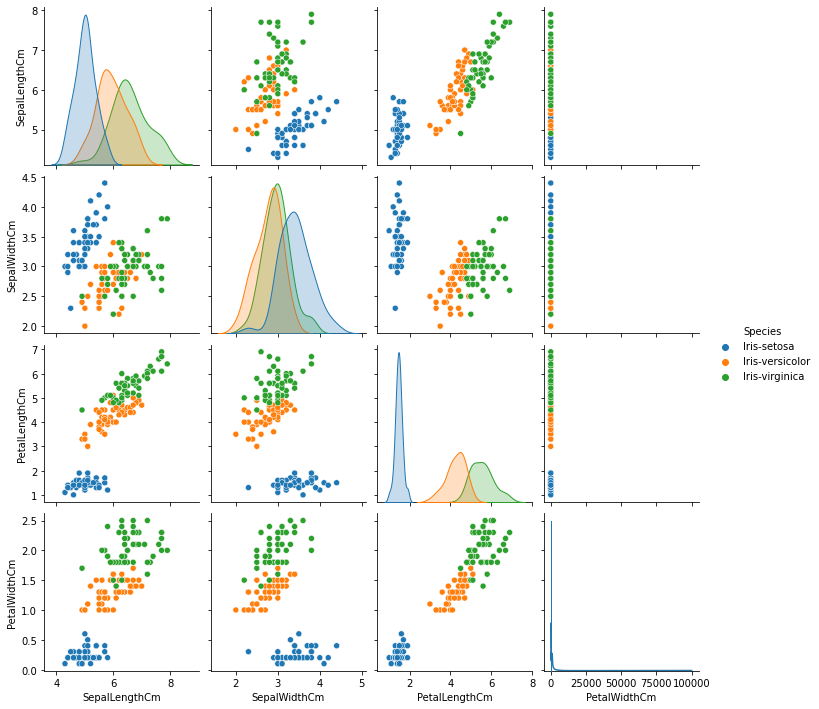

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) 

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() 

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
# plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")